In [4]:
import pandas as pd
import numpy as np

In [5]:
x = pd.Series([2.1, 2.3, 4.5, 2.2, 2.4]) # outlier is 4.5

In [9]:
# Median-Based Anomaly Detection
median = np.median(x)
threshold = 2
outliers = []
for item in x:
    if abs(item -median) > threshold:
        outliers.append(item)

print(median)
print(outliers)

2.3
[4.5]


In [11]:
# Mean-Based Anomaly Detection
mean = np.mean(x)
std = np.std(x)
outliers = []
for item in x:
    if ((item < mean - std) or (item > mean +std)):
        outliers.append(item)

print(mean)
print(std)
print(outliers)

2.7
0.9055385138137416
[4.5]


In [15]:
# Z-Score-Based Anomaly Detection
mean = np.mean(x)
std = np.std(x)
stdThreshold = 1.5
outliers = []
for item in x:
    z_score = abs(item - mean) /std
    if z_score > stdThreshold:
        outliers.append(item)

print(mean)
print(std)
print(outliers)

2.7
0.9055385138137416
[4.5]


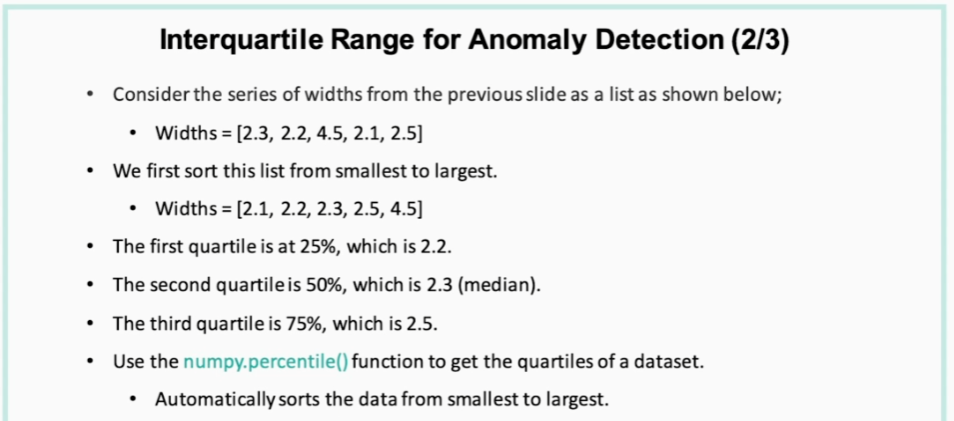

In [20]:
# Interquartile range IQR for Anomaly Detection
from IPython.display import Image
Image("iqr.png")

In [21]:
Q1, Q3 = np.percentile(x, [25, 75])
IQR = Q3 - Q1
stdThreshold = 1.5
outliers = []
for item in x:
    if item < (Q1 - stdThreshold * IQR) or item > (Q3 + stdThreshold * IQR):
        outliers.append(item)

print(Q1)
print(Q3)
print(IQR)
print(outliers)

2.2
2.4
0.19999999999999973
[4.5]


In [57]:
# DeaLing with missing values
data1 = {'name': ['Edison', 'Edward', 'James', 'Neesham'], 'Age':[27, 27, np.nan, 36]}
dfData1 = pd.DataFrame.from_dict(data1)
dfData1

,name,Age
0,Edison,27.0
1,Edward,27.0
2,James,NaN
3,Neesham,36.0


In [42]:
dfData1.isnull()

,name,Age
0,False,False
1,False,False
2,False,True
3,False,False


In [43]:
dfData1.isnull().sum()

name    0
Age     1
dtype: int64

In [38]:
# Remove missing values
dfData1.dropna(inplace=True)
dfData1

,name,Age
0,Edison,28.0
1,Edward,27.0
3,Neesham,36.0


In [51]:
# Replace missing values with mean
dfData1.fillna(dfData1['Age'].mean(), inplace=True)
dfData1

,name,Age
0,Edison,28.000000
1,Edward,27.000000
2,James,30.333333
3,Neesham,36.000000


In [55]:
# Mode Most frequent value in a data set
dfData1['Age'].mode()

0    27.0
Name: Age, dtype: float64

In [59]:
dfData1['Age'].fillna(dfData1['Age'].mode()[0], inplace=True)
dfData1

,name,Age
0,Edison,27.0
1,Edward,27.0
2,James,27.0
3,Neesham,36.0


In [60]:
# Regular Expression
import re
txt = 'Python is my favorite programming language. I love Python.'
x = re.findall('Python', txt)
x

['Python', 'Python']

In [61]:
len(x)

2

In [62]:
txt2 = 'Python was released in 1991.'
re.findall('\d', txt2)

['1', '9', '9', '1']

In [63]:
re.findall('\d+', txt2)

['1991']

In [64]:
txtList = ['Pakistan', 'Indonesia', 'Türkiye', 'Türkiye']
txt3 = pd.Series(txtList)
txt3

0     Pakistan
1    Indonesia
2      Türkiye
3      Türkiye
dtype: object

In [65]:
re.findall('Türkiye', txt3.to_string())

['Türkiye', 'Türkiye']

In [68]:
txt4 = 'Hello World'
match_object = re.search('World', txt4)
match_object

<re.Match object; span=(6, 11), match='World'>

In [69]:
match_object.span()

(6, 11)

In [70]:
txt5 = 'C is my favorite progamming language.'
re.sub(pattern='C', repl='Python', string=txt5)

'Python is my favorite progamming language.'

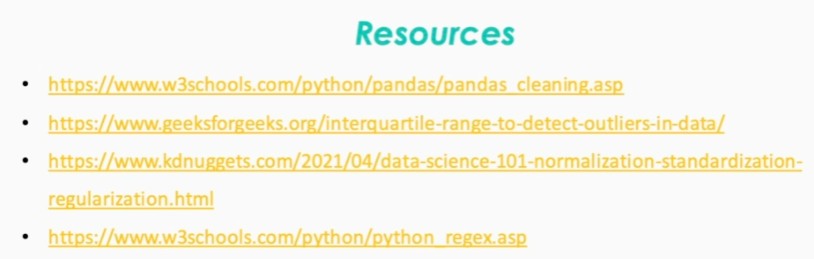

In [71]:
Image("resources.png")

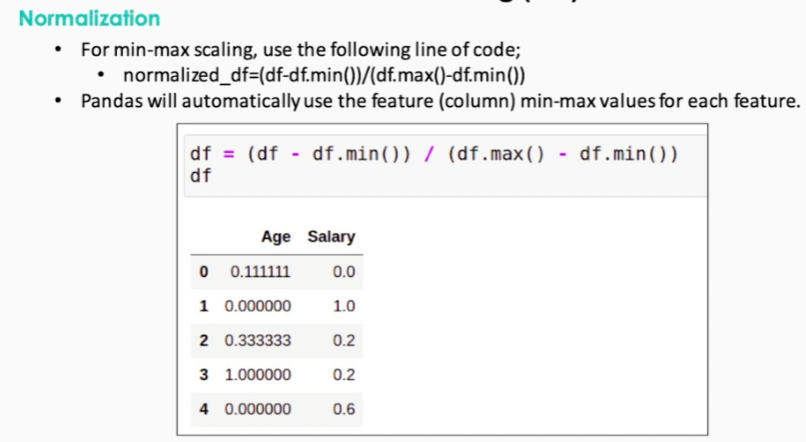

In [78]:
# Feature Scaling
Image("normalization.png") # also min max scaling

In [84]:
data2 = {'Age':[28, 27, 30 , 36, 27], 'Salary': [10000, 15000, 11000, 11000, 13000] }
dfData2 = pd.DataFrame.from_dict(data2)
dfData2

,Age,Salary
0,28,10000
1,27,15000
2,30,11000
3,36,11000
4,27,13000


In [85]:
dfData3 = (dfData2 -dfData2.min()) / (dfData2.max() - dfData2.min())
dfData3

,Age,Salary
0,0.111111,0.0
1,0.000000,1.0
2,0.333333,0.2
3,1.000000,0.2
4,0.000000,0.6


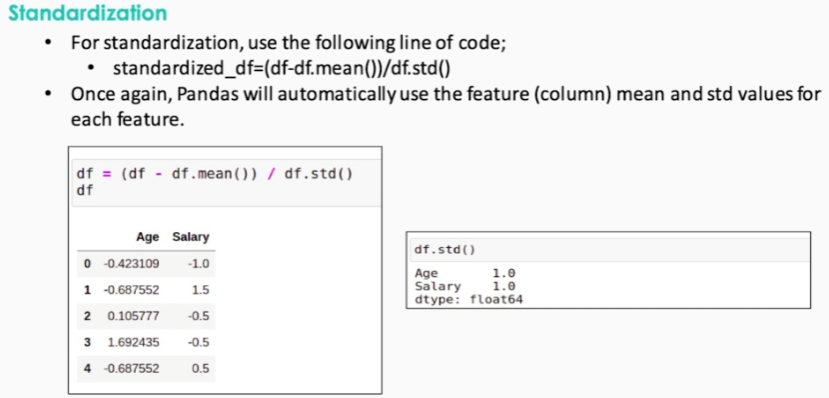

In [86]:
Image("standardization.png")

In [87]:
dfData4 = (dfData2 - dfData2.mean()) / dfData2.std()
dfData4

,Age,Salary
0,-0.423109,-1.0
1,-0.687552,1.5
2,0.105777,-0.5
3,1.692435,-0.5
4,-0.687552,0.5


In [88]:
dfData4.std()

Age       1.0
Salary    1.0
dtype: float64